**Logistic regression is a supervised machine learning algorithm widely used for binary classification tasks.**

# Import the libraries

In [589]:
#import the library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,precision_score,f1_score,classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Remove the warnings
import warnings 
warnings.filterwarnings("ignore")

# Import the dataset

In [590]:
#data import
df=sns.load_dataset("titanic")
# Print the first three lines of data
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


# Visualization/EDA

In [591]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

**Here our target column is survived ,so we compare the target column with other feature values**

In [592]:
df['sex'].value_counts()

sex
male      577
female    314
Name: count, dtype: int64

In [593]:
df['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [594]:
df.pclass.value_counts()

pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


**object categorical column**

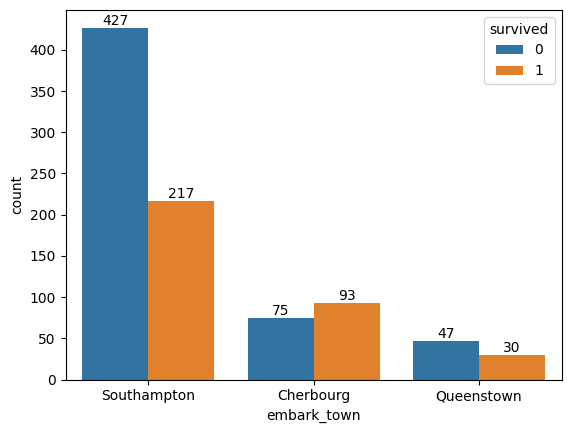

In [596]:
ax=sns.countplot(df,x="embark_town",hue="survived")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

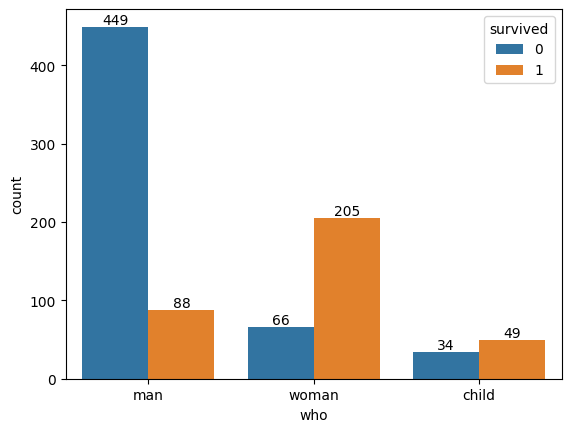

In [597]:
ax=sns.countplot(df,x="who",hue="survived")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

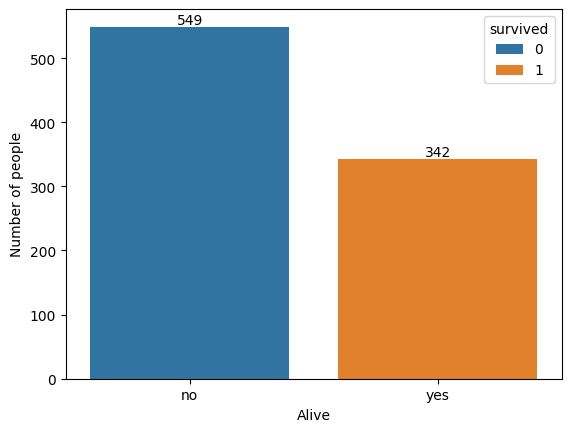

Total
alive
no     549
yes    342
Name: count, dtype: int64


In [598]:
ax=sns.countplot(df,x="alive",hue="survived")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("Alive")
    plt.ylabel("Number of people")
plt.show()
print("Total")
print(df["alive"].value_counts())

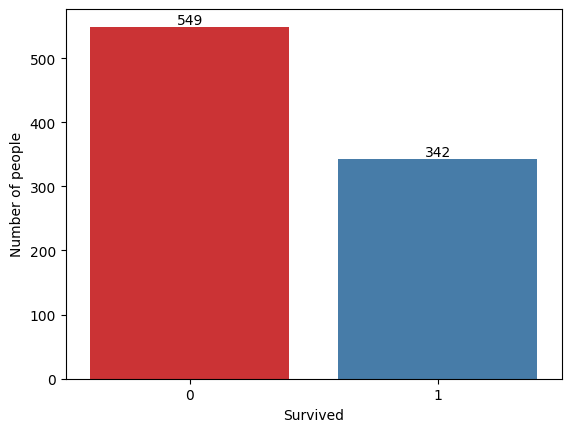

In [599]:
ax=sns.countplot(df,x=df["survived"],palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("Survived")
    plt.ylabel("Number of people")
plt.show()

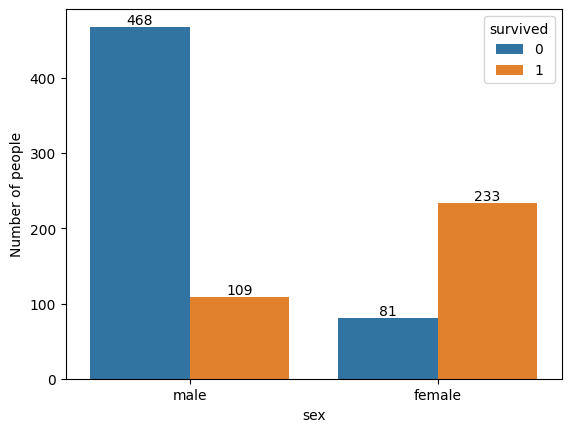

Total
sex
male      577
female    314
Name: count, dtype: int64


In [600]:
ax=sns.countplot(df,x="sex",hue="survived")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("sex")
    plt.ylabel("Number of people")
plt.show()
print("Total")
print(df["sex"].value_counts())

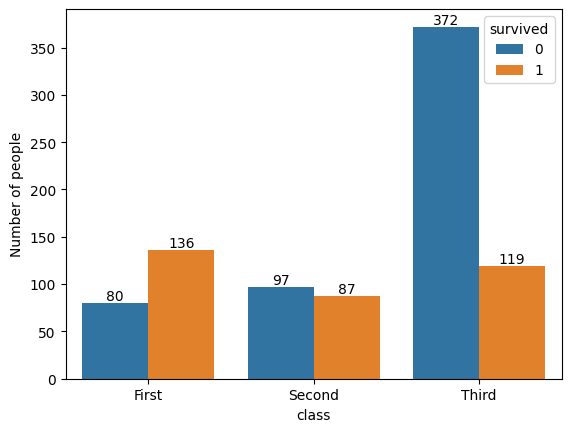

class
Third     491
First     216
Second    184
Name: count, dtype: int64


In [601]:
ax=sns.countplot(df,x="class",hue="survived")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("class")
    plt.ylabel("Number of people")
plt.show()
print(df["class"].value_counts())

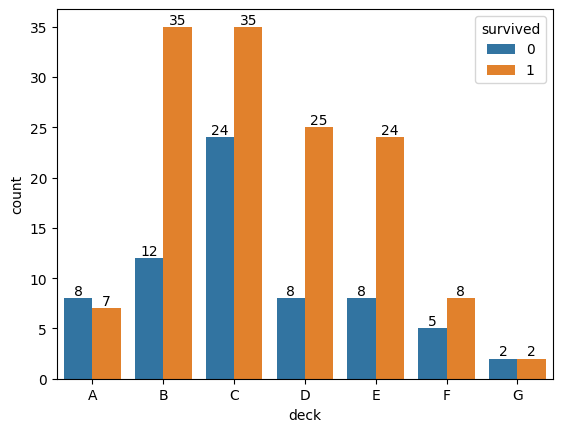

In [602]:
ax=sns.countplot(df,x="deck",hue="survived")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [603]:
df["deck"].value_counts().sum()
#Deck shows the lot of missing values 

203

**Bool**

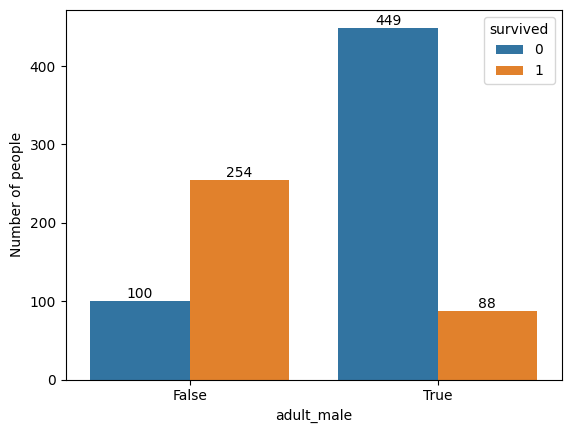

adult_male
True     537
False    354
Name: count, dtype: int64


In [604]:
ax=sns.countplot(df,x="adult_male",hue="survived")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("adult_male")
    plt.ylabel("Number of people")
plt.show()
print(df["adult_male"].value_counts())

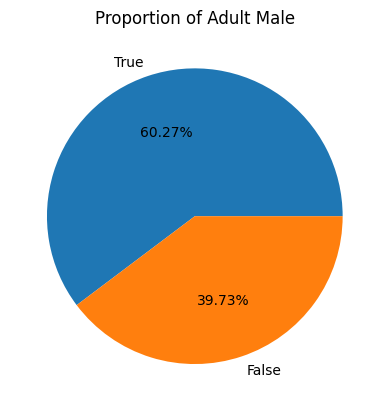

In [605]:
import matplotlib.pyplot as plt

# Count the values of True and False in the 'adult_male' column
value_counts = df['adult_male'].value_counts()

# Plot pie chart with the counts
plt.pie(value_counts, labels=value_counts.index, autopct="%1.2f%%")
plt.title("Proportion of Adult Male")
plt.show()


**int/float**

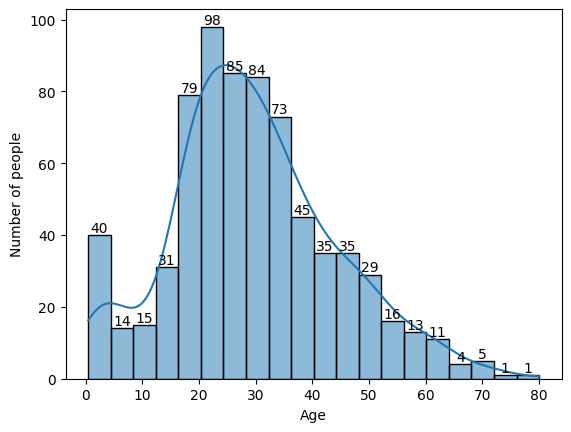

In [606]:
ax=sns.histplot(df,x="age",kde=True)
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("Age")
    plt.ylabel("Number of people")
plt.show()

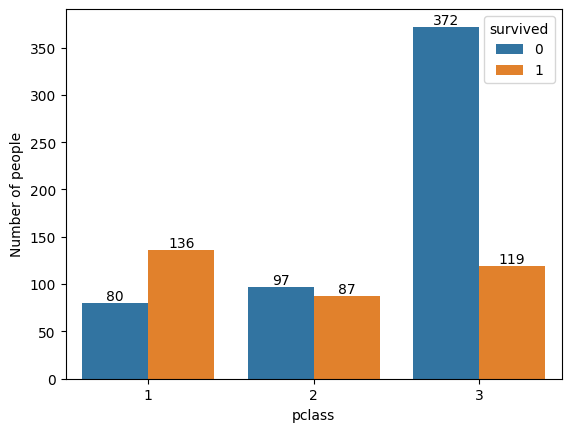

pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [607]:
ax=sns.countplot(df,x="pclass",hue="survived")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("pclass")
    plt.ylabel("Number of people")
plt.show()
print(df["pclass"].value_counts())


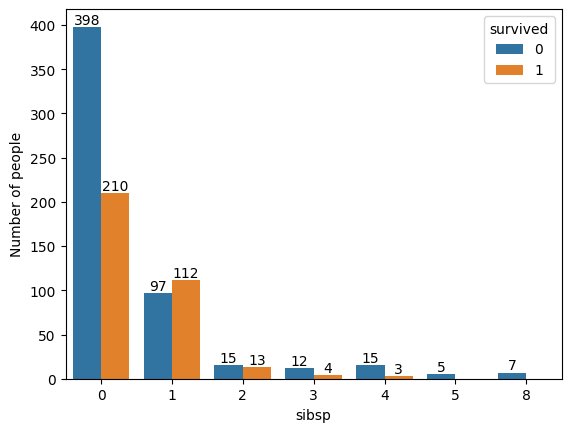

Total
sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


In [608]:
ax=sns.countplot(df,x="sibsp",hue="survived")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("sibsp")
    plt.ylabel("Number of people")
plt.show()
print("Total")
print(df["sibsp"].value_counts())

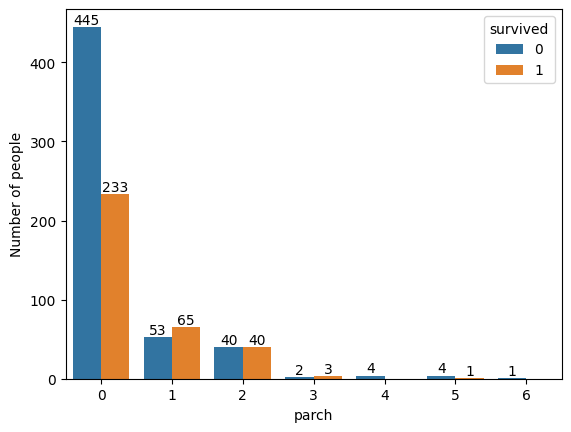

Total
parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [609]:
ax=sns.countplot(df,x="parch",hue="survived")
for i in ax.containers:
    ax.bar_label(i)
    plt.xlabel("parch")
    plt.ylabel("Number of people")
plt.show()
print("Total")
print(df["parch"].value_counts())

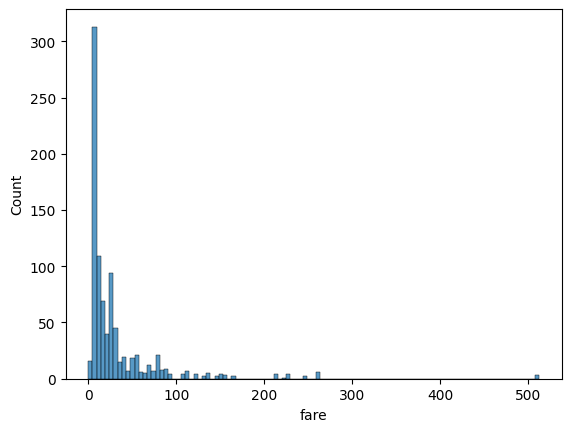

In [610]:
sns.histplot(data=df,x="fare")
plt.show()

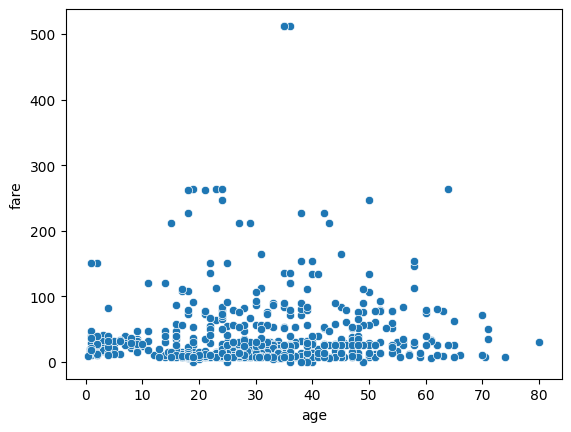

In [611]:
sns.scatterplot(x="age",y="fare",data=df)
plt.show()

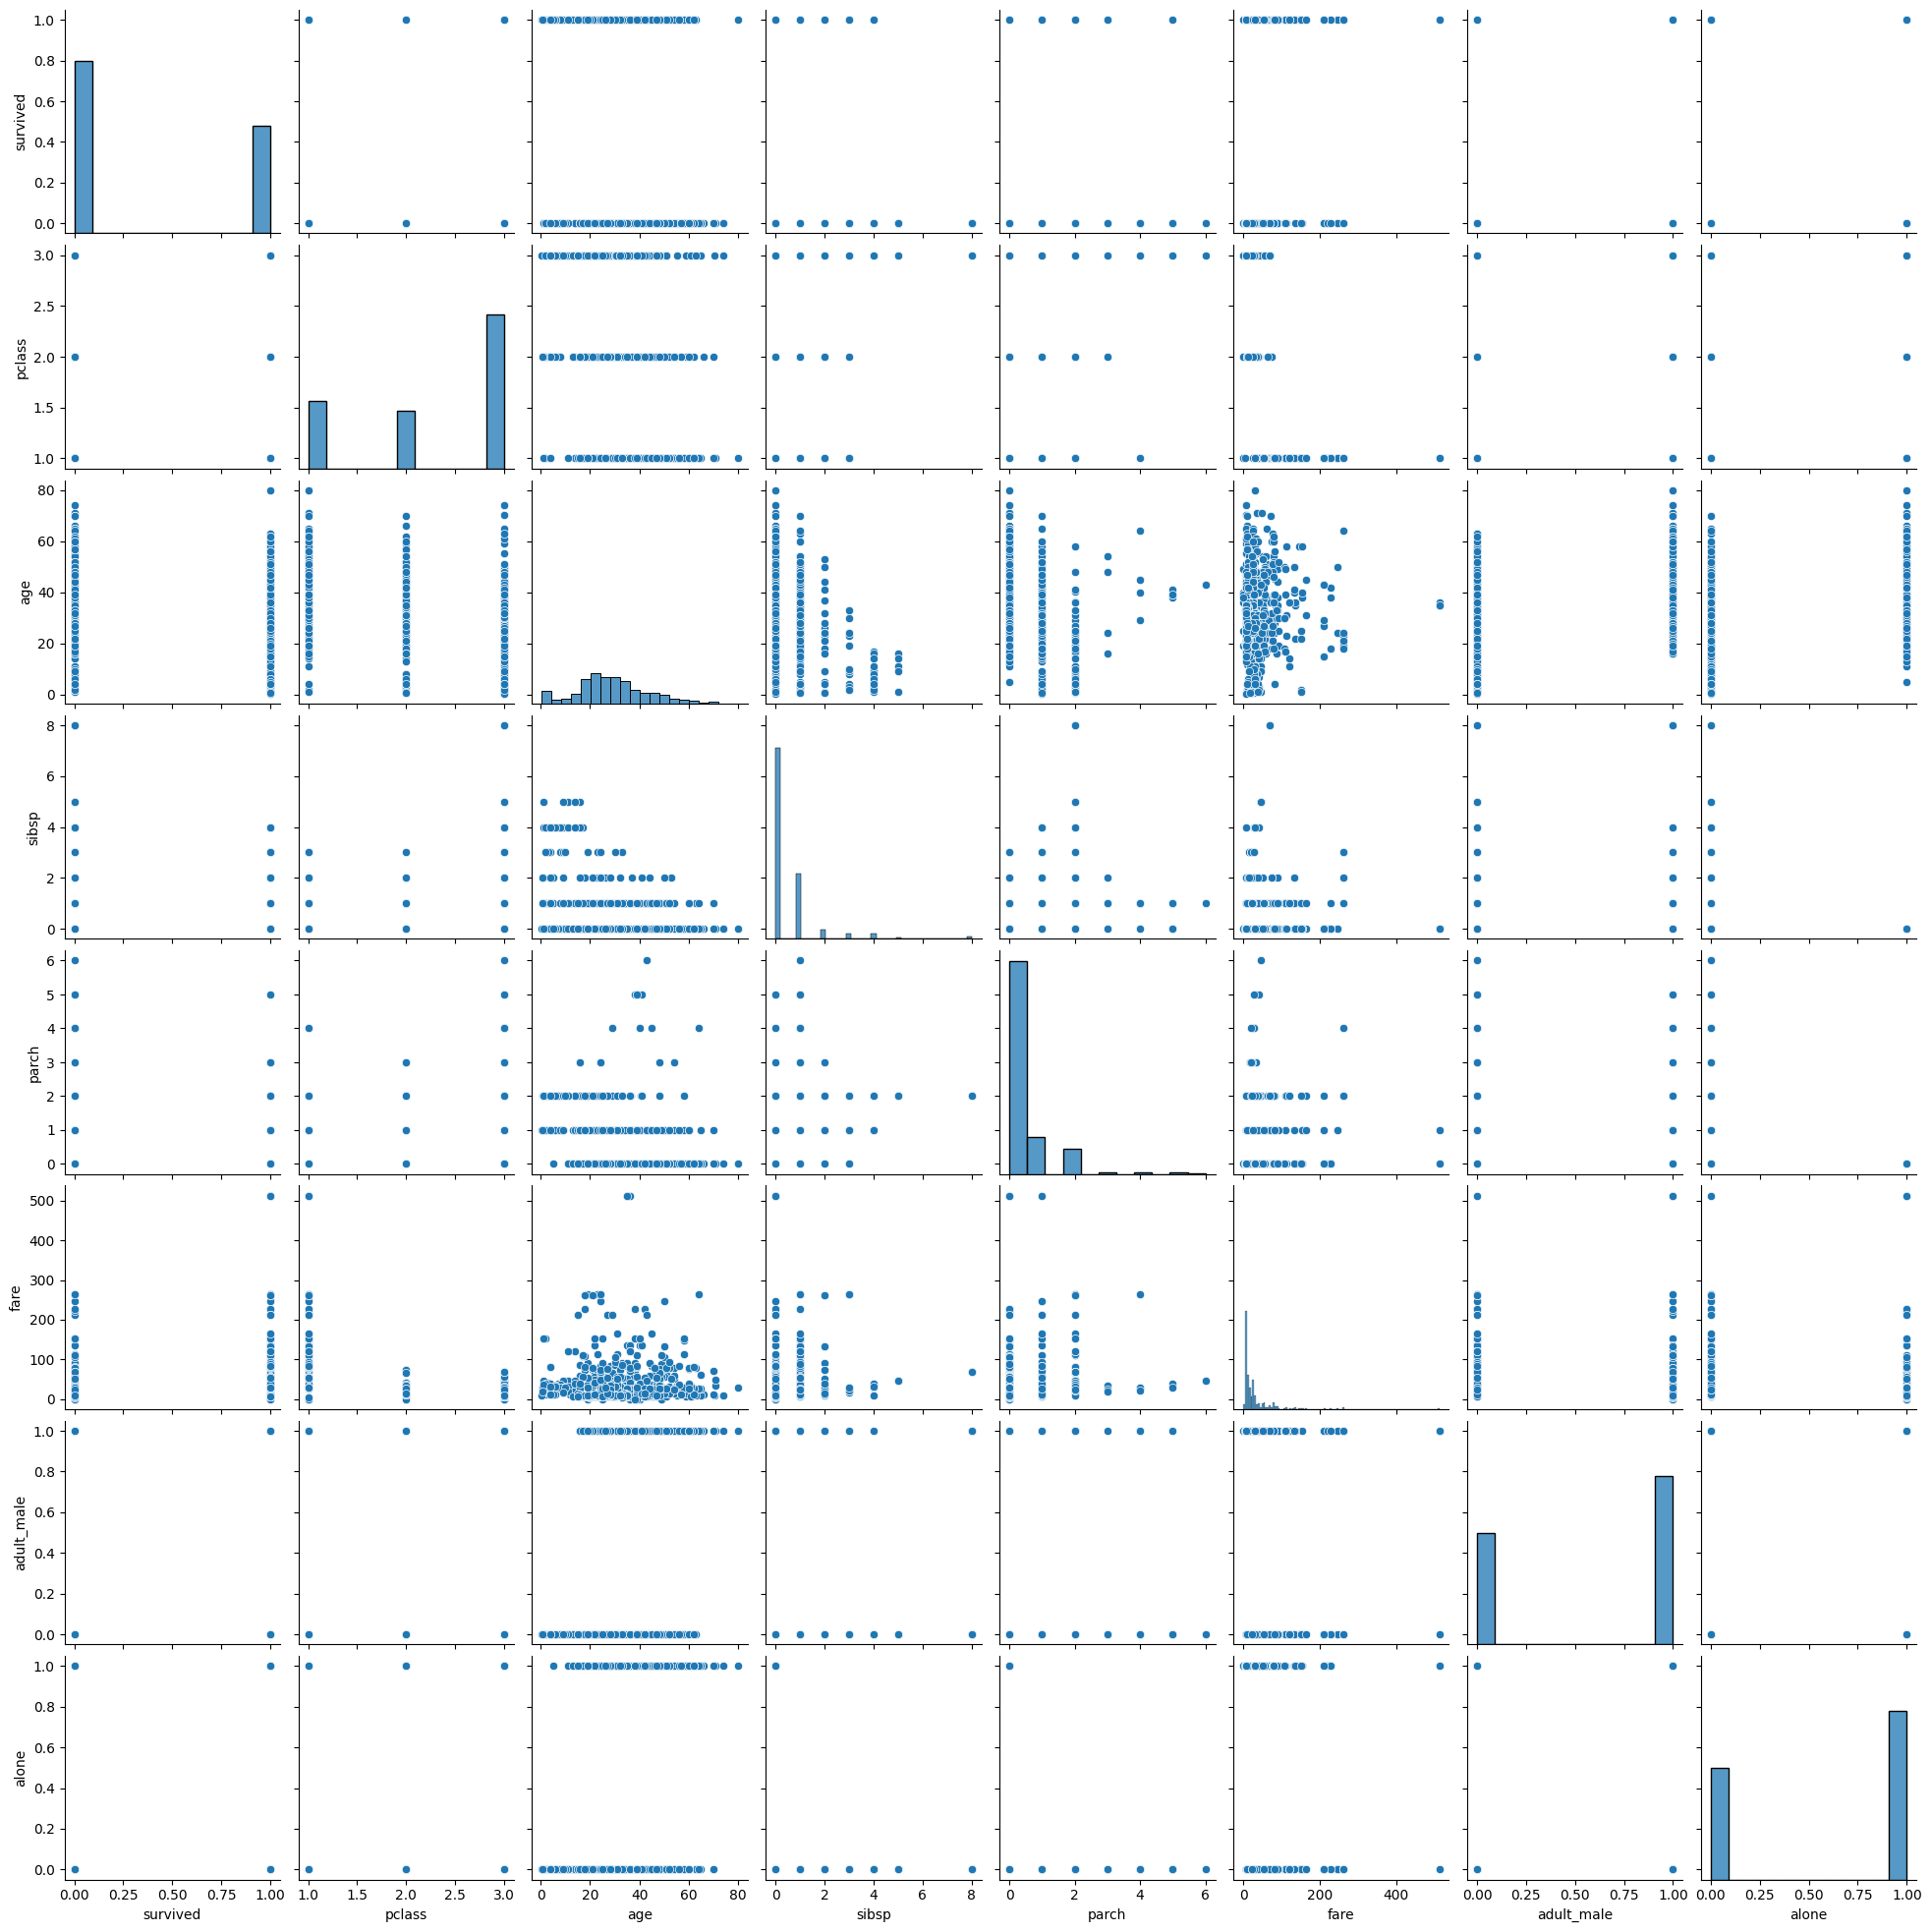

In [612]:
sns.pairplot(df)
plt.show()

# Preprocessing

In [613]:
# AS we explore the data above and important column related with our target ,
# so we clean and prepare the data for ML model

#Check the shape of data
df.shape

(891, 15)

In [614]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [615]:
#Descriptive analysis
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [616]:
#Check the missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [617]:
# #impute the missing value age and fare
df['age'].fillna(df['age'].median(),inplace=True)

# #impute the emarked and embark_town
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)

#deck column has the 77% missing value so we remove it.
df.drop("deck",axis=1,inplace=True)

In [618]:
688/891

0.7721661054994389

In [619]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [620]:
#Check the duplicated value
df.duplicated().sum()

116

In [621]:
#Drop the duplicated values
df=df.drop_duplicates()

df.duplicated().sum()

0

In [622]:
# #encode the categorical variable using loop where object and category encoded
for col in df.columns:
    
    if df[col].dtype=='object' or df[col].dtype.name=='category':
        df[col]=LabelEncoder().fit_transform(df[col])

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


# Apply model

In [623]:
#These column do not effect on accuracy of model 
# df.drop(columns=["fare","pclass","embarked"],axis=1,inplace=True)

In [624]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
872,0,1,1,33.0,0,0,5.0,2,0,1,True,2,0,True


In [625]:
#Separate the X and Y coloumn
X=df.drop("survived",axis=1)
Y=df["survived"]

In [626]:
#Train test and split the data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#build the model
model=LogisticRegression()
#CAll the model
model.fit(X_train,Y_train)

LogisticRegression()

In [627]:
#Predict the model
Y_pred=model.predict(X_test)

#Evalate the model
print("accuracy score = ",accuracy_score(Y_test,Y_pred))
print("Recal score = ",recall_score(Y_test,Y_pred))
print("Precision score = ",precision_score(Y_test,Y_pred))
print("F1 score = ",f1_score(Y_test,Y_pred))
print("Confussion matrices =\n ",confusion_matrix(Y_test,Y_pred))
print("Classification_report =\n ",classification_report(Y_test,Y_pred))

accuracy score =  1.0
Recal score =  1.0
Precision score =  1.0
F1 score =  1.0
Confussion matrices =
  [[95  0]
 [ 0 60]]
Classification_report =
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        60

    accuracy                           1.00       155
   macro avg       1.00      1.00      1.00       155
weighted avg       1.00      1.00      1.00       155



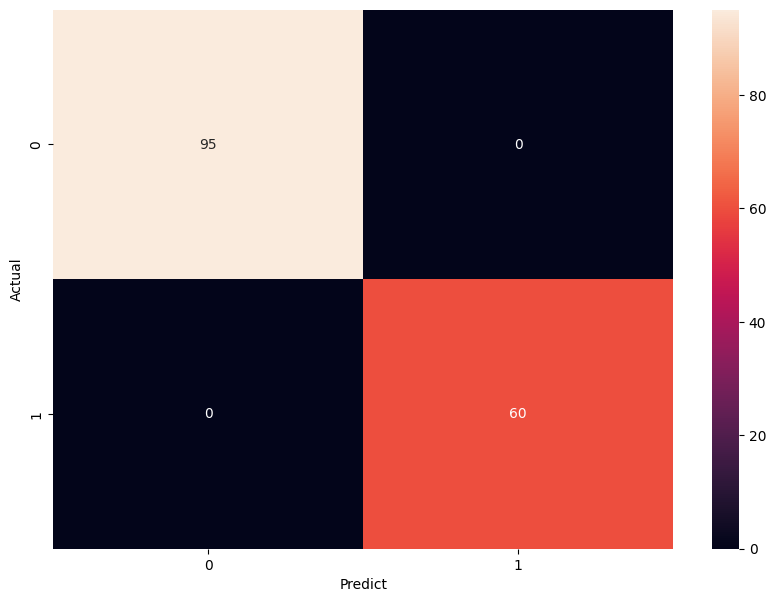

In [628]:
#Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt='d')
plt.xlabel("Predict")
plt.ylabel('Actual')
plt.show()

# predication

In [629]:
model.predict([[3,	1,	32.0,	0,	0,	7.925,	2,	2,	1,	True,	2,	1,	True]])

array([1], dtype=int64)

In [630]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
185,0,1,1,28.0,0,0,50.0,2,0,1,True,2,0,True
